#Importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
dir_url = "/content/drive/My Drive/Data Science 7th Semester/Project 3/genres_v2.csv"
final_dataset = pd.read_csv(dir_url, index_col = 0)

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Preprocessing

In [5]:
final_dataset.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
danceability,,,,,,,,,,,,,,,,,,,,,
0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
final_dataset.reset_index(inplace = True)

In [7]:
final_dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [8]:
final_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [9]:
final_dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [11]:
final_dataset.id.describe()

count                      42305
unique                     35877
top       7D5qMGajdfznFcXFArk5VE
freq                           9
Name: id, dtype: object

In [12]:
final_dataset.uri.describe()

count                                    42305
unique                                   35877
top       spotify:track:7D5qMGajdfznFcXFArk5VE
freq                                         9
Name: uri, dtype: object

In [13]:
final_dataset.duplicated().any()

False

In [14]:
final_dataset.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [15]:
for column in final_dataset.select_dtypes(include=['int64']).columns:
    final_dataset[column] = final_dataset[column].astype('float64')

In [16]:
final_dataset.shape

(42305, 22)

In [17]:
final_dataset.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [18]:
dataset = final_dataset.drop(['song_name', 'Unnamed: 0','title','type','id','track_href','analysis_url','uri','genre'], axis = 1)

In [19]:
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539.0,4.0
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427.0,4.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821.0,4.0
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661.0,3.0
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4.0,-5.148,1.0,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208.0,4.0
42301,0.517,0.768,0.0,-7.922,0.0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112.0,4.0
42302,0.361,0.821,8.0,-3.102,1.0,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823.0,4.0
42303,0.477,0.921,6.0,-4.777,0.0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200.0,4.0


In [20]:
final_dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


#Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
dataset_scld = scaler.fit_transform(dataset)

In [23]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

#Normalizing

In [21]:
from sklearn.preprocessing import normalize

In [22]:
dataset_nrmlzd = normalize(dataset)

#Kmeans

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Text(0, 0.5, 'WCSS')

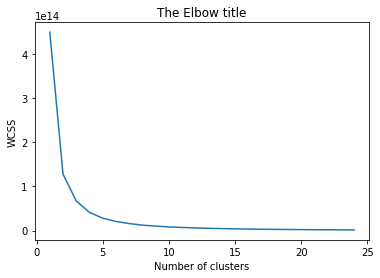

In [72]:
wcss=[]
for i in range(1,25):
  kmeans = KMeans(i)
  kmeans.fit(dataset)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,25)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

##Kmeans with scaled dataset

In [24]:
kmeans = KMeans(n_clusters=17, random_state=0)
clusters = kmeans.fit_predict(dataset_scld)
kmeans.cluster_centers_.shape
label = kmeans.labels_

In [25]:
final_dataset['Cluster'] = label

In [26]:
final_dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Cluster
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN,8
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN,10
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN,4
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,12
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN,8


In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_scld)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'Kmeans Scaled Data')

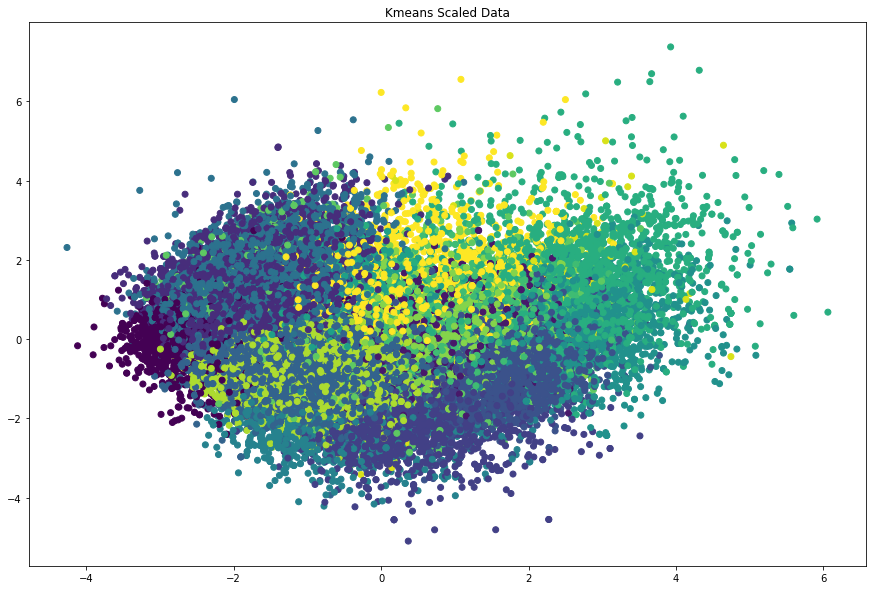

In [28]:
fig = plt.figure(figsize=(15,10))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c = clusters)
plt.title("Kmeans Scaled Data")

In [29]:
tsne = TSNE().fit_transform(dataset_scld)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


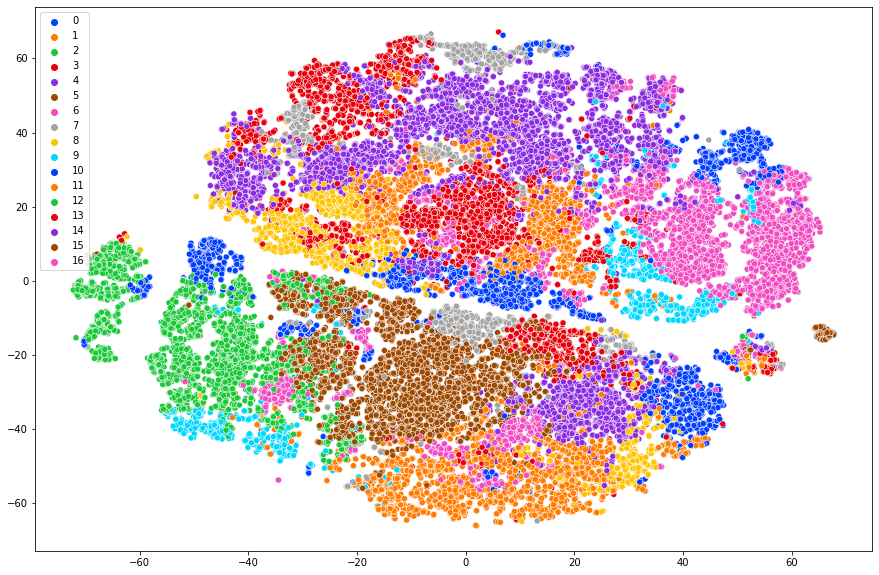

In [30]:
fig = plt.figure(figsize=(15,10))
palette = sns.color_palette("bright", 17)
sns.scatterplot(tsne[:,0], tsne[:,1],hue = clusters, legend = 'full', palette= palette)

In [31]:
with open('km.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [32]:
final_dataset.to_csv(r'C:\Users\dp\Desktop\Semester7th\Projects\DataScience\3\final_dataset.csv', index=False)

##Kmeans with normalized data

In [33]:
kmeans = KMeans(n_clusters=17, random_state=0)
clusters = kmeans.fit_predict(dataset_nrmlzd)
kmeans.cluster_centers_.shape

(17, 13)

In [34]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_nrmlzd)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'Kmeans Normalized Data')

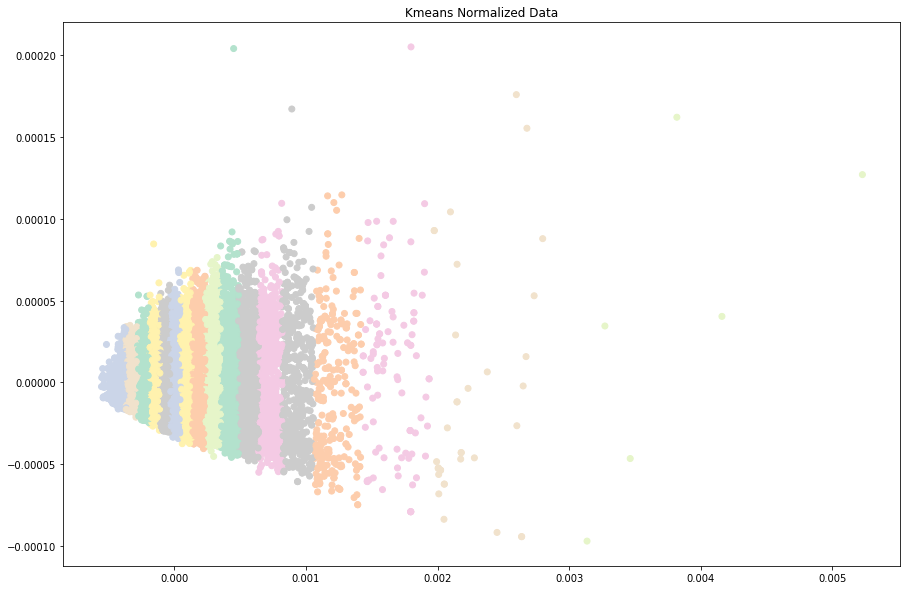

In [35]:
fig = plt.figure(figsize=(15,10))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c = clusters, cmap='Pastel2')
plt.title("Kmeans Normalized Data")

In [36]:
tsne = TSNE().fit_transform(dataset_nrmlzd)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


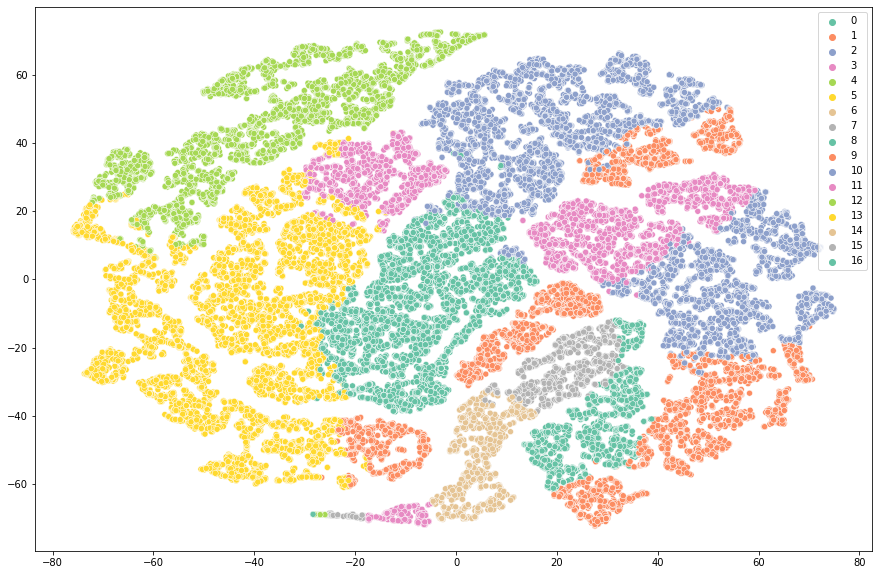

In [37]:
fig = plt.figure(figsize=(15,10))
palette = sns.color_palette("Set2", 17)
sns.scatterplot(tsne[:,0], tsne[:,1],hue = clusters, legend = 'full', palette= palette)

#BIRCH

In [38]:
from sklearn.cluster import Birch

##BIRCH with scaled data

In [39]:
brc = Birch(branching_factor=50, n_clusters=17, threshold=1.5)
brc.fit(dataset_scld)

Birch(n_clusters=17, threshold=1.5)

In [40]:
labels = brc.predict(dataset_scld)

In [41]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_scld)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'BIRCH Scaled Data')

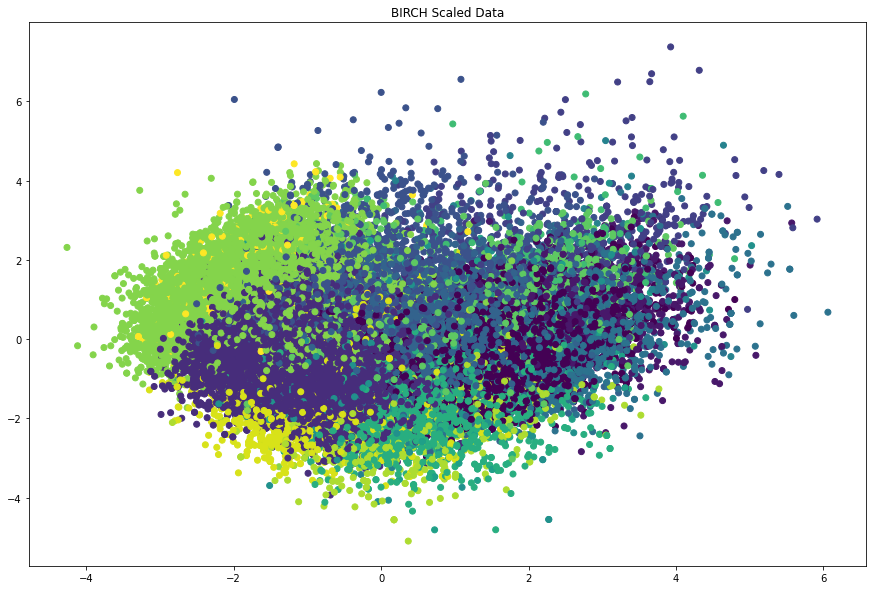

In [42]:
fig = plt.figure(figsize=(15,10))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=labels)
plt.title("BIRCH Scaled Data")

In [43]:
tsne = TSNE().fit_transform(dataset_scld)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


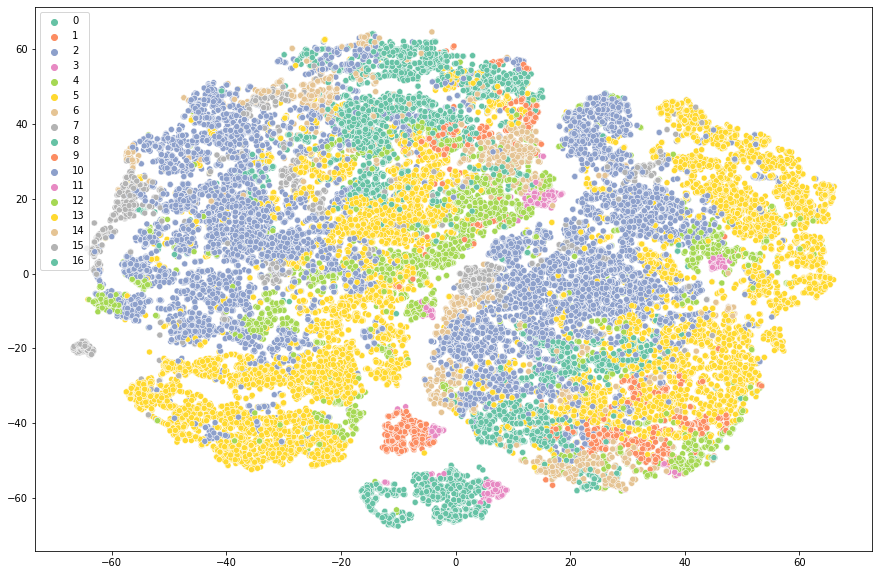

In [44]:
fig = plt.figure(figsize=(15,10))
palette = sns.color_palette("Set2", 17)
sns.scatterplot(tsne[:,0], tsne[:,1],hue = labels, legend = 'full', palette= palette)

##BIRCH with normalized data

In [45]:
brc = Birch(branching_factor=50, n_clusters=17, threshold=1.5)
brc.fit(dataset_nrmlzd)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (17). Decrease the threshold.
  ConvergenceWarning,


Birch(n_clusters=17, threshold=1.5)

In [46]:
labels = brc.predict(dataset_nrmlzd)

In [47]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_nrmlzd)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, 'BIRCH Normalized Data')

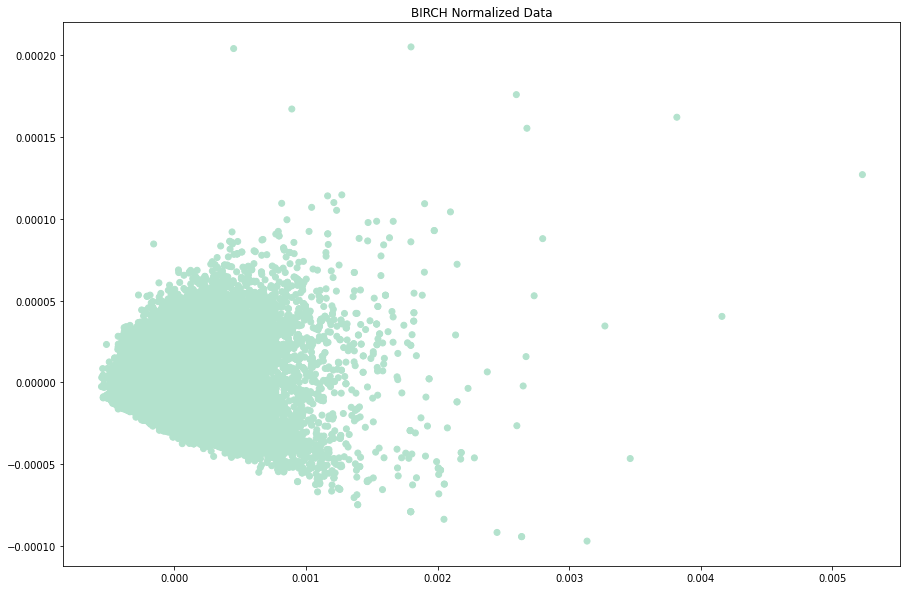

In [48]:
fig = plt.figure(figsize=(15,10))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],cmap='Pastel2',c=labels)
plt.title("BIRCH Normalized Data")